<a href="https://colab.research.google.com/github/CardosoJr/ml/blob/master/DataViz/viz_book/STWD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some viz from Storytelling with data

In [2]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline

In [3]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [4]:
# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [5]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

## Plot 1

In [6]:
# survey responses
X = ['Bored', 'Not great', 'OK', 'Kind of\ninterested', 'Excited']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

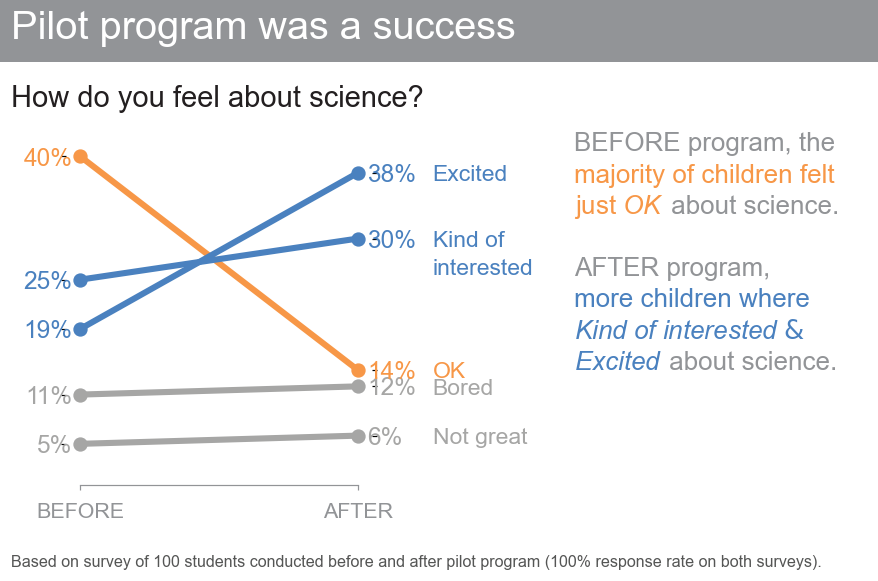

In [7]:
# create new figure
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# matplotlib doesn't have slopegraph drawing tool, so we use
# double axis approach
# create a twin Axes sharing the xaxis with the same limits for y-axis
ax2 = ax1.twinx()

ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])

# assign colors for responses
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]
# draw slopegraph lines with circles at ends
for i in range(5):
    # draw circles
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # draw line
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # add label
    plt.text(1.27,
             Z[i] + (-1, -4.4)[i == 3],  # shift third label down more
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

# change the appearance of ticks, tick labels, and gridlines
# (don't show left and right ticks)
ax1.tick_params(left='off')
ax2.tick_params(right='off')

# set properties for axes object
plt.setp(ax1,
         xticks=[0, 1],  # two x-ticks only 0 and 1
         xticklabels=['BEFORE', 'AFTER'],  # with text labels
         yticks=Y,  # tick for all pre- responses %
         yticklabels=[str(v) + '%' for v in Y])  # with n% labels

# set properties for secondary axes object
plt.setp(ax2,
         yticks=Z,  # tick for all post- responses %
         yticklabels=[str(v) + '%' for v in Z])  # with n% labels

# remove chart border
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# configure both y's tick labels appearance
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # use trasformations to shift y tick labels
        # left y labels slightly right, and right labels slightly left
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change x ticks color
ax1.tick_params(axis='x', colors=GRAY7)
# add bottom spine with gray color and bounds between 0 and 1
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# titile the plot
plt.text(-0.25, 54.3,
         'Pilot program was a success' + ' ' * 32,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.25, 46, 'How do you feel about science?', fontsize=19, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.25, -10,
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).',
         fontsize=10.5,
         color=GRAY3)

# add before text note highlighthing some words orange
rainbow_text(1.78, 33,
             'BEFORE program, the\n'
             'majority of children felt\n'
             'just $\\mathit{OK}$|| about science.',
             [[GRAY7], [ORANGE1], [ORANGE1, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

# add after text note highlighthing some words with blue
rainbow_text(1.78, 14,
             'AFTER program,\n'
             'more children where\n'
             '$\\it{Kind\ of\ interested\ &}$\n'
             '$\\it{Excited}$|| about science.',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

## Plot 2

In [8]:
# concerns and their distribution
X = ['Front seat audio/entertainment/navigation controls',
     'Bluetooth system is difficult to use',
     'Steering system/wheel has too much play',
     'Bluetooth system has poor sound quality',
     'Hesitation or delay when shifting',
     'Excessive wind noise',
     'Seat material concerns',
     'Engine makes abnormal/excessive noise',
     'Tires make excessive noise while driving',
     'Engine power is less than expected']
Y = [8.2, 8.6, 8.8, 10.0, 10.3, 11.0, 11.6, 11.6, 12.3, 12.9]

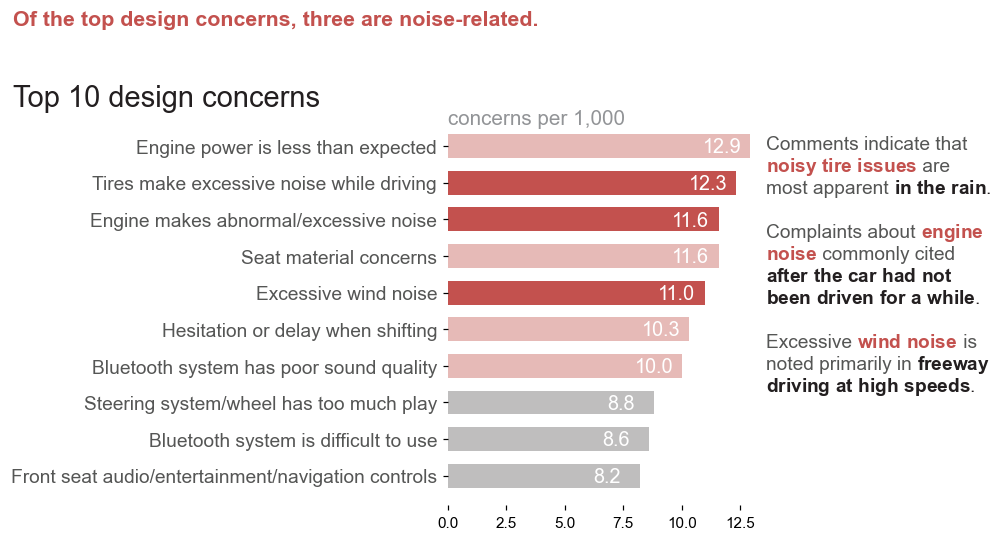

In [9]:
# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY9]*3 + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() - 2, b.get_y() + 0.15,
             str(Y[i]),
             fontsize=13,
             color='white')

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelbottom='off')

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-18.6, 10.1, 'Top 10 design concerns', fontsize=19, color=GRAY1)
ax1.text(-18.6, 12.3, 'Of the top design concerns, three are noise-related.',
         fontsize=14, color=RED1, fontweight='bold')
ax1.text(0, 9.6, 'concerns per 1,000', fontsize='13.5', color=GRAY7)

# add text note with concerns description
rainbow_text(
    13.6, 2.3,
    'Comments indicate that\n'
    '$\\bf{noisy\ tire\ issues}$|| are\n'
    'most apparent ||$\\bf{in\ the\ rain}$.\n'
    ' \n'
    'Complaints about ||$\\bf{engine}$\n'
    '$\\bf{noise}$|| commonly cited\n'
    '$\\bf{after\ the\ car\ had\ not}$\n'
    '$\\bf{been\ driven\ for\ a\ while}$.\n'
    ' \n'
    'Excessive ||$\\bf{wind\ noise}$|| is\n'
    'noted primarily in ||$\\bf{freeway}$\n'
    '$\\bf{driving\ at\ high\ speeds}$.',
    [[GRAY3], [RED1, GRAY3], [GRAY3, GRAY1],
     [GRAY1],
     [GRAY3, RED1], [RED1, GRAY3], [GRAY1], [GRAY1],
     [GRAY1],
     [GRAY3, RED1, GRAY3], [GRAY3, GRAY1], [GRAY1]],
    spacing=22,
    ax=ax1,
    fontsize=12.5)

## Plot 3

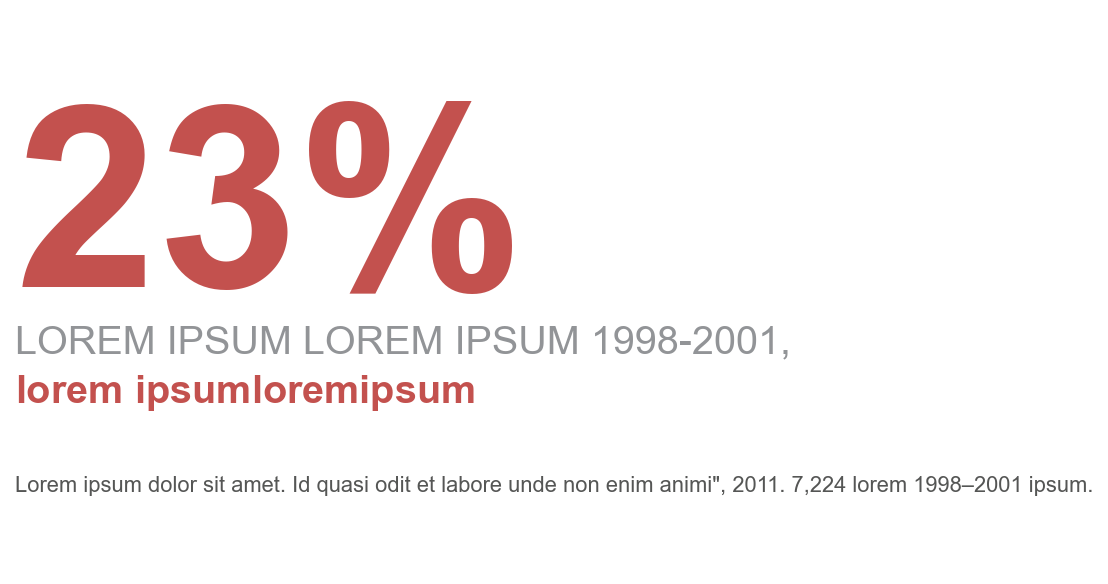

In [10]:
plt.figure(figsize=(7.45, 4.9), dpi=150)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
plt.text(-0.15, 0.51, '$\\bf{23\%}$', fontsize=122, color=RED1)
plt.text(-0.15, 0.39,
         'LOREM IPSUM LOREM IPSUM 1998-2001,',
         fontsize=19,
         color=GRAY7)
plt.text(-0.15, 0.30,
         '$\\bf{lorem\ ipsum lorem ipsum}$',
         fontsize=19,
         color=RED1)
plt.text(-0.15, 0.14,
         'Lorem ipsum dolor sit amet. Id quasi odit et labore unde non enim animi", 2011. '
         '7,224 lorem 1998–2001 ipsum.',
         fontsize=10.5,
         color=GRAY3);

## Plot 4

In [11]:
from matplotlib.pyplot import Rectangle

X1 = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
      'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
X2 = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
      'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140]
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177]

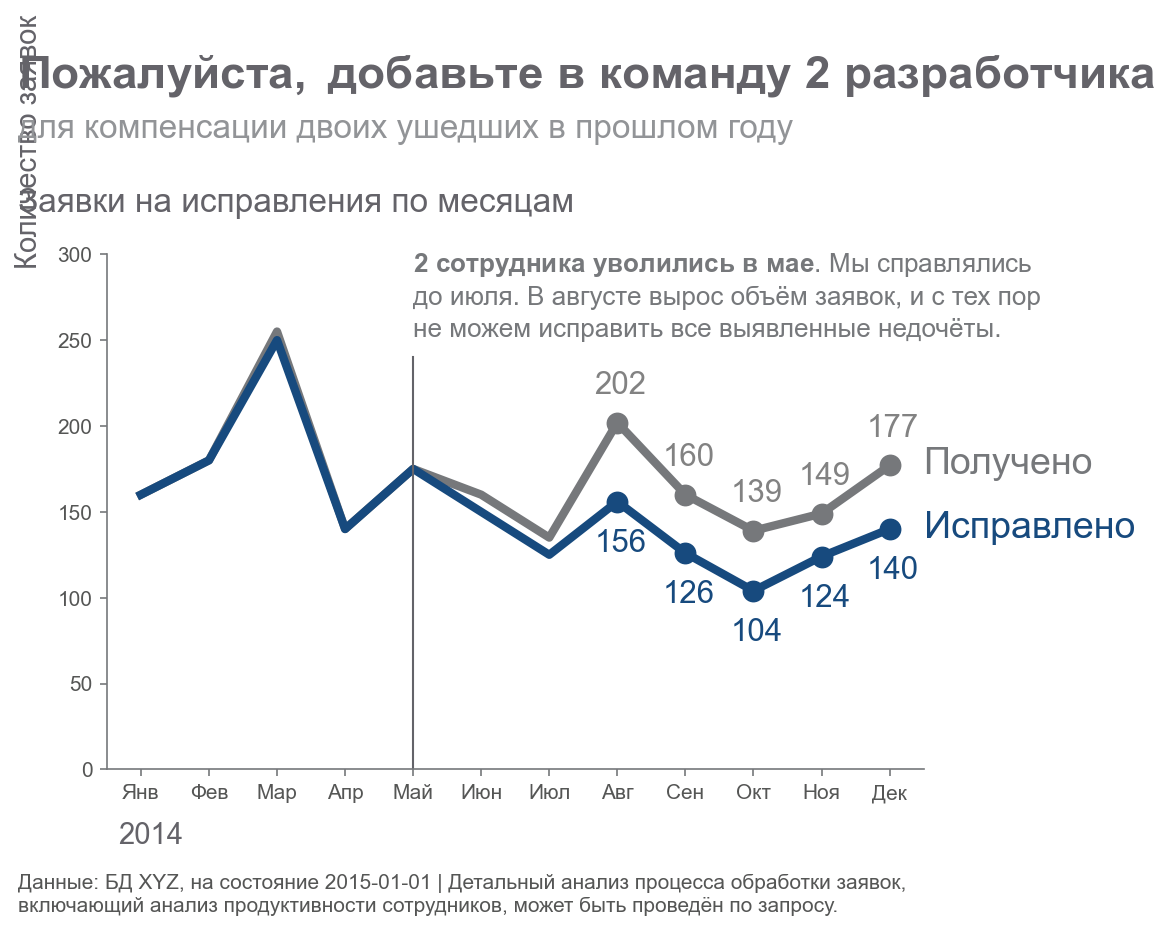

In [12]:
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), dpi=150)
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.plot(range(12), Z, linewidth=4, color=GRAY5)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY5)
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1)
# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points)
                 color=GRAY6,
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=BLUE1,
                 fontsize=15)
ax1.set_xlim([-0.5, 11.5])
ax1.set_ylim([0, 300])
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X1,
         yticks=list(range(0, 350, 50)))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(11.5, 172, 'Получено', fontsize=18, color=GRAY5)
ax1.text(11.5, 135, 'Исправлено', fontsize=18, color=BLUE1)
ax1.tick_params(color=GRAY5)
ax1.spines['left'].set_color(GRAY5)
ax1.spines['bottom'].set_color(GRAY5)
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_color(GRAY3)

ax1.text(-1.80, 325, 'Заявки на исправления по месяцам', fontsize=16, color=GRAY4)
ax1.text(-1.85, 295, 'Количество заявок', fontsize=14, rotation='vertical',
         color=GRAY4)
ax1.text(-0.34, -43, '2014', fontsize=14, color=GRAY4)
ax1.text(-1.8, -83,
         'Данные: БД XYZ, на состояние 2015-01-01 | Детальный анализ процесса обработки заявок,\n'
         'включающий анализ продуктивности сотрудников, может быть проведён по запросу.',
         fontsize=10, color=GRAY3, linespacing=1.3)
ax1.text(-1.8, 397, '$\\bf{Пожалуйста,\ добавьте\ в\ команду\ 2\ разработчика}$',
         fontsize=22, color=GRAY4)
ax1.text(-1.8, 368, 'для компенсации двоих ушедших в прошлом году',
         fontsize=16, color=GRAY7)
ax1.text(4, 252,
         '$\\bf{2\ сотрудника\ уволились\ в\ мае}$. Мы справлялись\nдо июля. '
         'В августе вырос объём заявок, и с тех пор\nне можем исправить '
         'все выявленные недочёты.',
         fontsize=12.5, color=GRAY5, linespacing=1.4)
plt.axvline(x=4, ymax=0.8, color='#636369', linewidth=1)
pass

## Plot 5

C:\Users\anilton.cardoso\AppData\Local\Temp\ipykernel_11320\1615768174.py:37: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  value = (Y[i], Z[i])[b.get_x() > 0]  # is it letf bar or right


Text(1.33, 41.5, '50%')

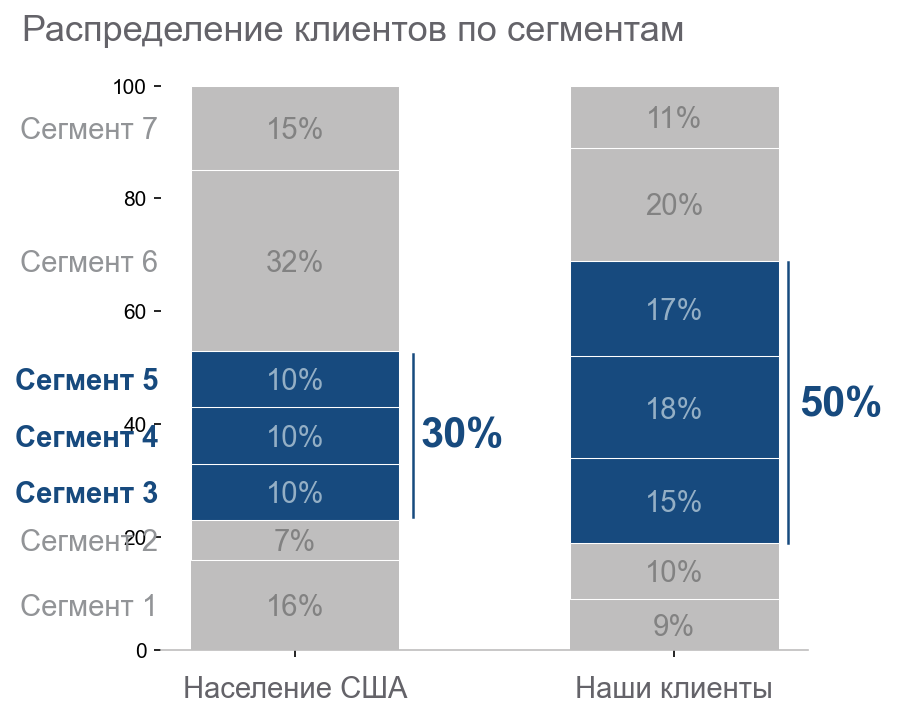

In [13]:
X = ['Сегмент ' + str(i) for i in range(1, 8)]
Y = [16, 7,  10, 10, 10, 32, 15] # US Population
Z = [9,  10, 15, 18, 17, 20, 11] # Our Customers

fig, ax1 = plt.subplots(figsize=(7, 5), dpi=150)

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)

# colors for bars drawing, numerical labeling and name labeling
C = [GRAY9] * 2 + [BLUE1] * 3 + [GRAY9] * 2
CT = [GRAY6] * 2 + [BLUE4] * 3 + [GRAY6] * 2
CL = [GRAY7] * 2 + [BLUE1] * 3 + [GRAY7] * 2

# draw stacked bars plot
bottom = np.array([0, 0])  # bottom accumulates starting points
for i in range(len(X)):
    bars = plt.bar([0, 1],
                   [Y[i], Z[i]],
                   bottom=bottom,  # for stacking
                   color=C[i],
                   # for white border
                   edgecolor=('white', 'none')[i == 0],
                   linewidth=0.5,
                   width=0.55)  # enlarge whitespace between

    ax1.text(-0.36,
             Y[i] / 2 + bottom[0] - 1.9,
             X[i],
             fontsize=14,
             horizontalalignment='right',
             color=CL[i],
             # use bold for blue color text
             fontweight=('normal', 'bold')[CL[i] == BLUE1])
    # add numerical data labels for each bar
    for bi, b in enumerate(bars):
        value = (Y[i], Z[i])[b.get_x() > 0]  # is it letf bar or right
        ax1.text(b.get_x() + b.get_width() / 2,  # x-center of bar
                 b.get_y() + b.get_height() / 2 - 1.9,  # y-center of bar
                 str(value) + '%',  # value with %
                 fontsize=14,
                 horizontalalignment='center',
                 color=CT[i])

    bottom += np.array([Y[i], Z[i]])

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

# remove chart border
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# set category tick locations and labels of the x-axis
plt.xticks([0, 1], ['Население США', 'Наши клиенты'])

# configure responses labels appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# set bottom border color
ax1.spines['bottom'].set_color(GRAY9)

# title the plot
ax1.text(-0.72, 108, 'Распределение клиентов по сегментам', color=GRAY4, 
         fontsize=17.4)

# add vertical reference lines
ax1.axvline(0.31, ymin=0.225, ymax=0.5, color=BLUE1, linewidth=1.2)
ax1.axvline(1.3, ymin=0.18, ymax=0.655, color=BLUE1, linewidth=1.2)

# add text to reference lines
ax1.text(0.33, 36, '30%', fontweight='bold', fontsize=20, color=BLUE1)
ax1.text(1.33, 41.5, '50%', fontweight='bold', fontsize=20, color=BLUE1)

## Plot 6

Text(-20, 16, 'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

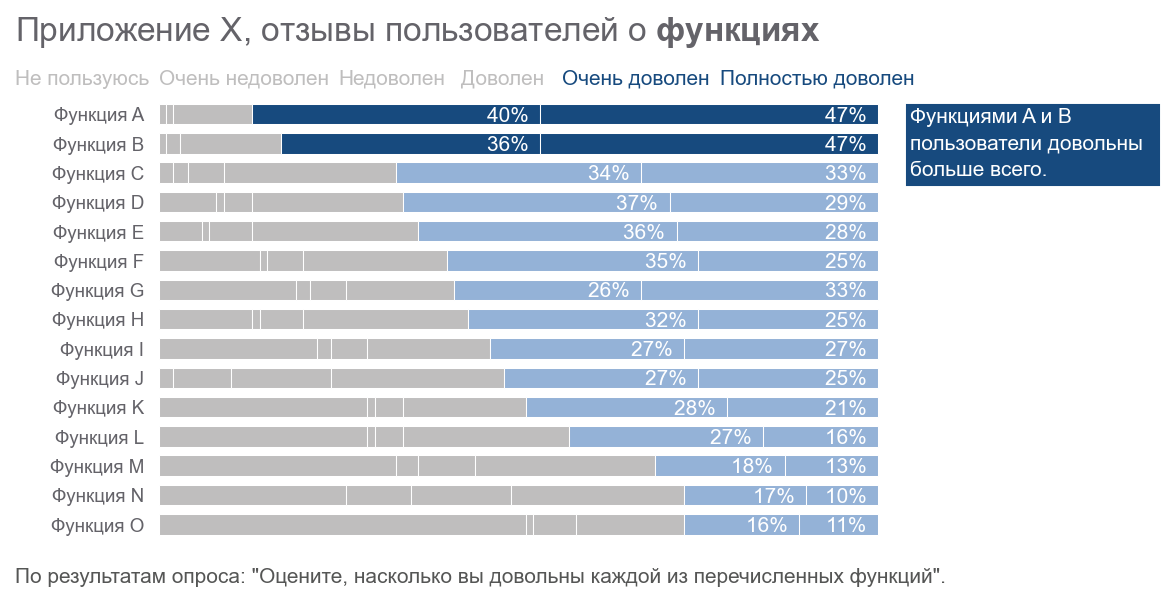

In [14]:
X = ['Функция ' + l for l in list('ABCDEFGHIJKLMNO')]
D = np.array([
    [0,  1, 1,  11, 40, 47],
    [0,  1, 2,  14, 36, 47],
    [2,  2, 5,  24, 34, 33],
    [8,  1, 4,  21, 37, 29],
    [6,  1, 6,  23, 36, 28],
    [14, 1, 5,  20, 35, 25],
    [19, 2, 5,  15, 26, 33],
    [13, 1, 6,  23, 32, 25],
    [22, 2, 5,  17, 27, 27],
    [2,  8, 14, 24, 27, 25],
    [29, 1, 4,  17, 28, 21],
    [29, 1, 4,  23, 27, 16],
    [33, 3, 8,  25, 18, 13],
    [26, 9, 14, 24, 17, 10],
    [51, 1, 6,  15, 16, 11]
])
colors = [
    [GRAY9]*14 + [GRAY9],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*15,
    [BLUE1]*2 + [BLUE3]*13,
    [BLUE1]*2 + [BLUE3]*13
]

def set_bar_pcnt(bar, val):
    plt.text(bar.get_x()+bar.get_width(), bar.get_y()+bar.get_height()-0.1,
             str(val)+'%  ',
             fontsize=10,
             horizontalalignment='right',
             color='white')    

fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()
rec = Rectangle((104, -0.29), 35, 2.7, fill=True, lw=1, color=BLUE1)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    
ax1.text(104.4, 2.1,
         'Функциями A и B\n'
         'пользователи довольны\n'
         'больше всего.',
         fontsize=10, color='white', linespacing=1.5)
for j in range(D.shape[0]):
    for i in [4, 5]:
        set_bar_pcnt(bars[i][j], D[j, i])
ax1.text(-20, -1, 'Не пользуюсь', color=GRAY9)
ax1.text(0, -1, 'Очень недоволен', color=GRAY9)
ax1.text(25, -1, 'Недоволен', color=GRAY9)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=BLUE1)
ax1.text(78, -1, 'Полностью доволен', color=BLUE1)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

Text(-20, 16, 'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

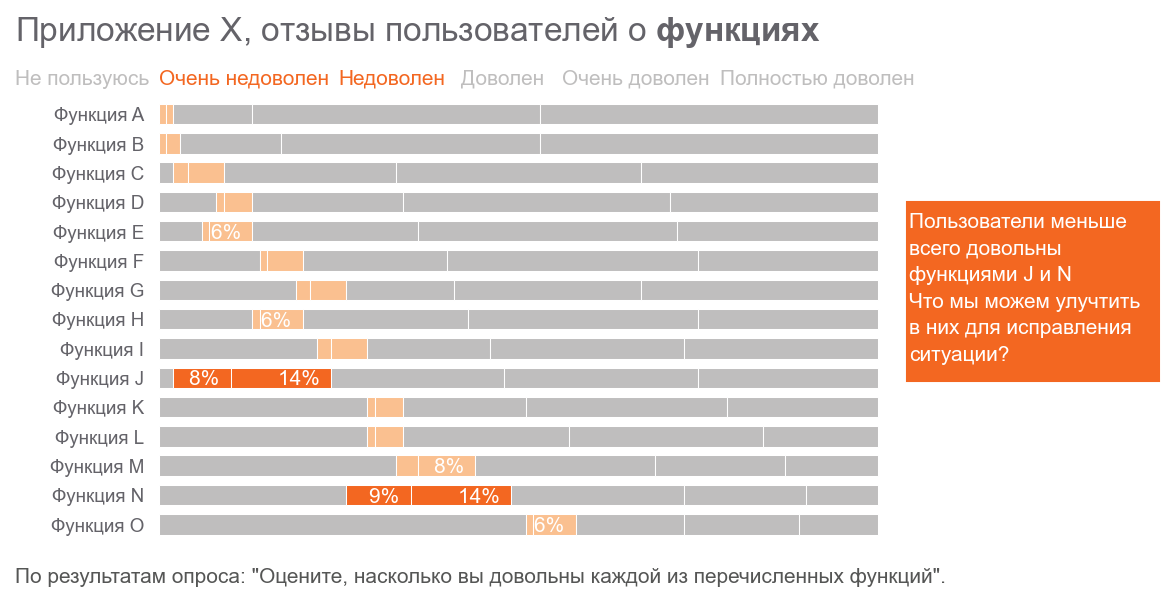

In [15]:
colors = [
    [GRAY9]*14 + [GRAY9],
    [ORANGE2]*9 + [ORANGE3] + [ORANGE2]*3 + [ORANGE3] + [ORANGE2],
    [ORANGE2]*9 + [ORANGE3] + [ORANGE2]*3 + [ORANGE3] + [ORANGE2],
    [GRAY9]*15,
    [GRAY9]*2 + [GRAY9]*13,
    [GRAY9]*2 + [GRAY9]*13
]

fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()

rec = Rectangle((104, 3), 35, 6.1, fill=True, lw=1, color=ORANGE3)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)


ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    

ax1.text(104.3, 8.4,
         'Пользователи меньше\n'
         'всего довольны\n'
         'функциями J и N\n'
         'Что мы можем улучтить\n'
         'в них для исправления\n'
         'ситуации?',
         fontsize=10, color='white', linespacing=1.5)
for j in range(D.shape[0]):
    for i in [1, 2]:
        if D[j, i] > 5:
            set_bar_pcnt(bars[i][j], D[j, i])

ax1.text(-20, -1, 'Не пользуюсь', color=GRAY9)
ax1.text(0, -1, 'Очень недоволен', color=ORANGE3)
ax1.text(25, -1, 'Недоволен', color=ORANGE3)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=GRAY9)
ax1.text(78, -1, 'Полностью доволен', color=GRAY9)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

Text(-20, 16, 'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".')

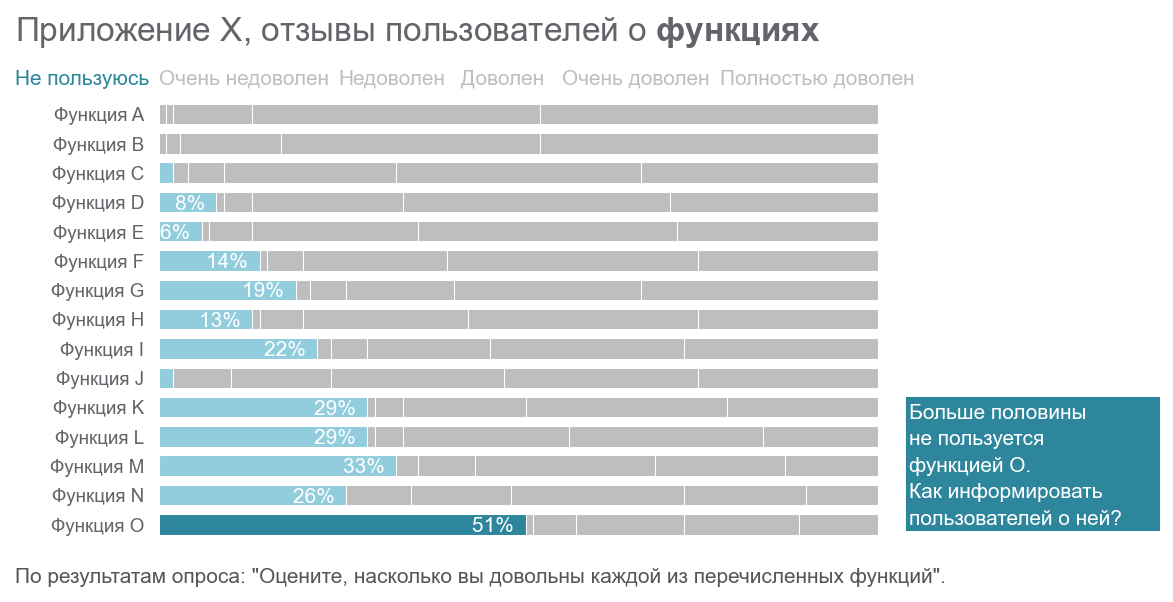

In [16]:
colors = [
    [BLUE5]*14 + [BLUE6],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*9 + [GRAY9] + [GRAY9]*3 + [GRAY9] + [GRAY9],
    [GRAY9]*15,
    [GRAY9]*2 + [GRAY9]*13,
    [GRAY9]*2 + [GRAY9]*13
]

fig, ax1 = plt.subplots(figsize=(9.5, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            range(D.shape[0]), 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.5, 
            height=0.7))
    bottom += D[:, i]
ax1.invert_yaxis()

rec = Rectangle((104, 9.7), 35, 4.5, fill=True, lw=1, color=BLUE6)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

ax1.tick_params(bottom=False, left=False, labelleft=True, labelbottom=False)
for spine in ax1.spines.values():
    spine.set_visible(False)
plt.yticks(range(len(X)), X)
for item in ax1.get_yticklabels():
    item.set_fontsize(9)
    item.set_color(GRAY4)
    
ax1.text(104.3, 14,
         'Больше половины\n'
         'не пользуется\n'
         'функцией O.\n'
         'Как информировать\n'
         'пользователей о ней?',
         fontsize=10, color='white', linespacing=1.5)

for j in range(D.shape[0]):
    for i in [0]:
        if D[j, i] > 5:
            set_bar_pcnt(bars[i][j], D[j, i])

ax1.text(-20, -1, 'Не пользуюсь', color=BLUE6)
ax1.text(0, -1, 'Очень недоволен', color=GRAY9)
ax1.text(25, -1, 'Недоволен', color=GRAY9)
ax1.text(42, -1, 'Доволен', color=GRAY9)
ax1.text(56, -1, 'Очень доволен', color=GRAY9)
ax1.text(78, -1, 'Полностью доволен', color=GRAY9)
ax1.text(-20, -2.5, 'Приложение X, отзывы пользователей о $\\bf{функциях}$', fontsize=16, color=GRAY4)
ax1.text(-20, 16,
         'По результатам опроса: "Оцените, насколько вы довольны каждой из перечисленных функций".',
         fontsize=10, color=GRAY3, linespacing=1.3)

## Plot 7

Text(55.6, 1700, 'По результатам опроса: "Оцените, насколько вы довольны новым автомобилем"... Основные претензии:\n... Чаще всего поломки... Среднее количество поломок на 1000 составляет...\n')

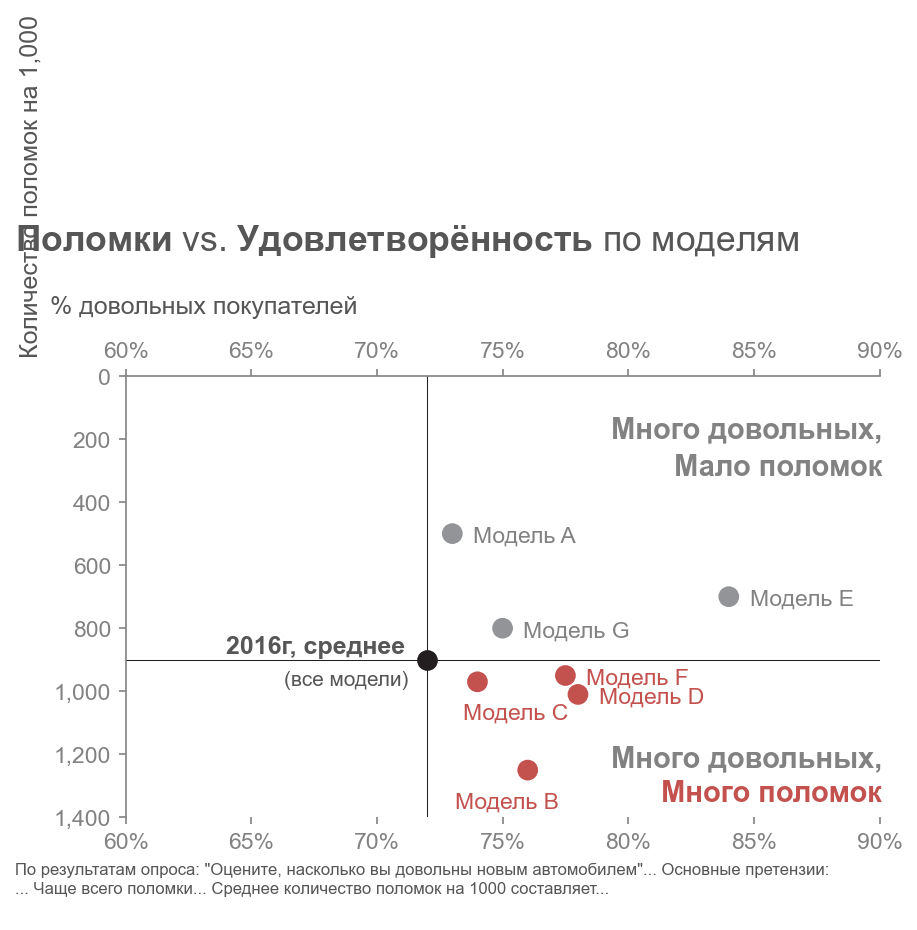

In [17]:
X = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Y = np.array([(73, 500), (76, 1250), (74, 970), (78, 1010),
              (84, 700), (77.5, 950), (75, 800)])

fig, ax1 = plt.subplots(figsize=(8.2, 5.4), dpi=150)
fig.subplots_adjust(left=0.262, right=0.875, top=0.605, bottom=0.06)
colors = [GRAY7, RED1, RED1, RED1, GRAY7, RED1, GRAY7]
ax1.scatter(Y[:, 0], Y[:, 1], color=colors, s=80)
txt_colors = [GRAY6, RED1, RED1, RED1, GRAY6, RED1, GRAY6]
offsets = [(10, -4), (-35, -18), (-7, -18), (10, -4), 
           (10, -4), (10, -4), (10, -4)]
for i, n in enumerate(X):
    ax1.annotate('Модель ' + n,
                 Y[i],
                 xytext=offsets[i],
                 textcoords='offset points',
                 color=txt_colors[i],
                 fontsize=11)

ax1.scatter([72], [900], color=GRAY1, s=80)
plt.axvline(x=72, color=GRAY1, linewidth=0.5)
plt.axhline(y=900, color=GRAY1, linewidth=0.5)
ax1.text(64, 880, '2016г, среднее', color=GRAY3, fontsize=12, 
         fontweight='bold')
ax1.text(66.3, 980, '(все модели)', color=GRAY3, fontsize=10)
ax1.set_xlim([60, 90])
ax1.set_ylim([0, 1400])

ax1.invert_yaxis()

xticks = list(range(60, 95, 5))
yticks = list(range(0, 1600, 200))
plt.setp(ax1,
         xticks=xticks,
         xticklabels=[str(i)+'%' for i in xticks],
         yticks=yticks)

ax1.tick_params(top='on', bottom='off', labelbottom='off', labeltop='on')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(11)
    i.set_color(GRAY6)

ax1.tick_params(color=GRAY6)
ax1.spines['top'].set_color(GRAY6)
ax1.spines['left'].set_color(GRAY6)

ax1.text(55.8, -75, 'Количество поломок на 1,000', color=GRAY3, 
         rotation='vertical',  fontsize=12)
ax1.text(57, -200, '% довольных покупателей', color=GRAY3, 
         fontsize=12)

kw = {'fontweight': 'bold', 'horizontalalignment': 'right'}
ax1.text(90.1, 195, 'Много довольных,', fontsize=14, color=GRAY6, **kw) 
ax1.text(90.1, 315, 'Мало поломок', fontsize=14, color=GRAY6, **kw)
ax1.text(90.1, 1240, 'Много довольных,', fontsize=14, color=GRAY6, **kw)
ax1.text(90.1, 1350, 'Много поломок', fontsize=14, color=RED1, **kw)
ax1.text(55.6, -400, '$\\bf{Поломки}$ vs. $\\bf{Удовлетворённость}$ по моделям', color=GRAY3, fontsize=17)
ax1.text(55.6, 1700,
         'По результатам опроса: "Оцените, насколько вы довольны новым автомобилем"... Основные претензии:\n'
         '... Чаще всего поломки... Среднее количество поломок на 1000 составляет...\n'
         ,
         fontsize=8, color=GRAY3, linespacing=1.3)

## Plot 8 

Text(-1.45, 280, 'Expected director population over time')

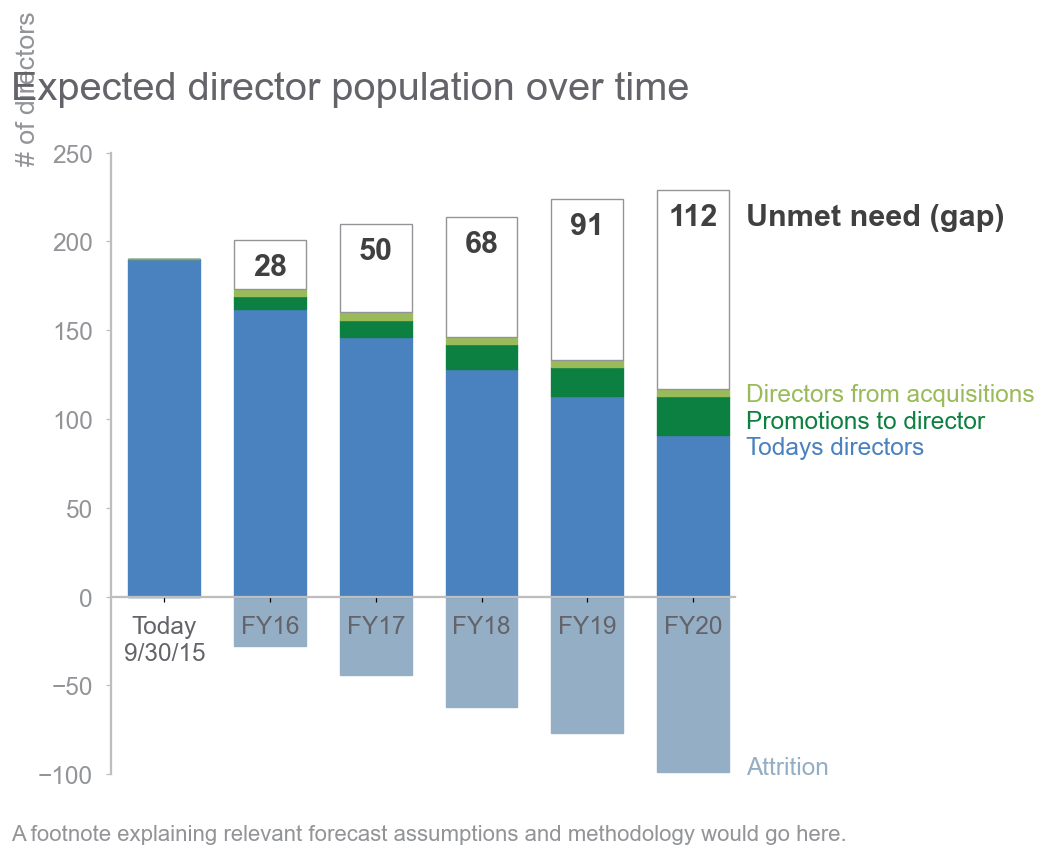

In [18]:
# # directors by year
X = ['Today\n9/30/15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY20']
YA = np.array([0, -28, -44, -62, -77, -99]) # attrition
YT = np.array([190, 162, 146, 128, 113, 91]) # today
YP = np.array([0, 7, 10, 14, 16, 22]) # promoted
YQ = np.array([0, 4, 4, 4, 4, 4]) # acquisition
YU = np.array([0, 28, 50, 68, 91, 112]) # unmet gap

# create new figure
fig, ax1 = plt.subplots(figsize=(9.5, 7.2),  # width, height in inches
                        dpi=110)  # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.103, right=0.7, top=0.881, bottom=0.096)

# set the data limits for the y,x-axis
ax1.set_ylim([-100, 250])
ax1.set_xlim([-0.5, 5.4])
# move x axes to zero
ax1.spines['bottom'].set_position('zero')

plt.bar(list(range(0, 6)), YA, width=0.68, color=BLUE4, 
        edgecolor=BLUE4, linewidth=0.9)
plt.bar(list(range(0, 6)), YT, width=0.68, color=BLUE2, 
        edgecolor=BLUE2, linewidth=0.9)
plt.bar(list(range(0, 6)), YP, width=0.68, bottom=YT, color=GREEN1, 
        edgecolor=GREEN1, linewidth=0.9)
plt.bar(list(range(0, 6)), YQ, width=0.68, bottom=YT + YP, color=GREEN2, 
        edgecolor=GREEN2, linewidth=0.9)
white_bars = plt.bar(list(range(0, 6)), YU, width=0.68, bottom=YT + YP + YQ, 
                     color='white', edgecolor=GRAY7, linewidth=0.9)

# add numerical data labels for bars
for i, b in enumerate(white_bars):
    if YU[i] == 0:
        continue
    x = b.get_x() + b.get_width() / 2  # x-center of bar
    y = b.get_y() + b.get_height() - 20  # y-top of bar
    ax1.text(x, y,
             str(YU[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY2)

# add text for numerical data labels
ax1.text(5.5, y, 'Unmet need (gap)', fontsize=20, fontweight='bold', 
         color=GRAY2)

# add text labeling other bars
ax1.text(5.5, 110, 'Directors from acquisitions', fontsize=16, color=GREEN2)
ax1.text(5.5, 95, 'Promotions to director', fontsize=16, color=GREEN1)
ax1.text(5.5, 80, 'Today''s directors', fontsize=16, color=BLUE2)
ax1.text(5.5, -100, 'Attrition', fontsize=16, color=BLUE4)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, xticks=list(range(0, 6)), xticklabels=X)

# remove chart border
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color(GRAY9)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# change y ticks color
ax1.tick_params(axis='y', colors=GRAY9)
# hide x ticks
ax1.tick_params(bottom='off')

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # use trasformations to shift y tick labels slightly left
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# title the axis
ax1.text(-1.4, 246, '# of directors', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# add footnote with the data source
plt.text(-1.45, -137,
         'A footnote explaining relevant forecast assumptions'
         ' and methodology would go here.',
         fontsize=14.5, color=GRAY7)

# title the plot
plt.text(-1.45, 280, 'Expected director population over time', 
         fontsize=26, color=GRAY4)

## Plot 9

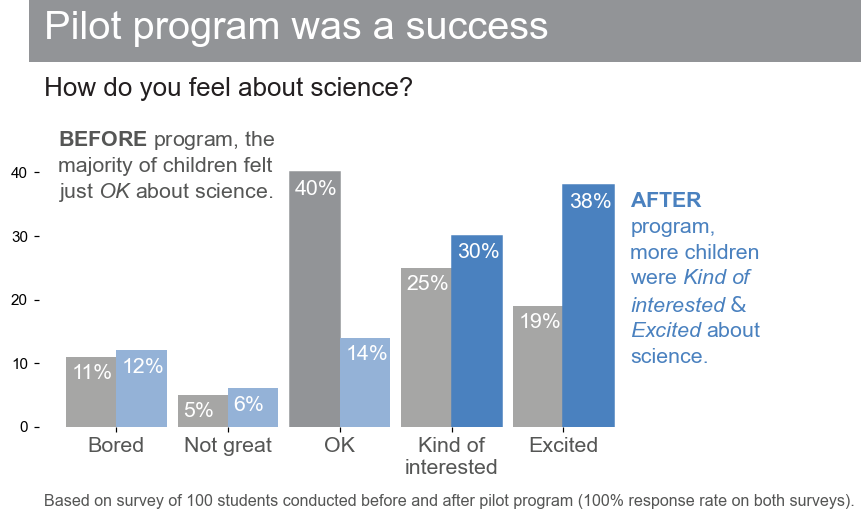

In [19]:
# survey responses
X = ['Bored', 'Not great', 'OK', 'Kind of\ninterested', 'Excited']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=14,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY7, BLUE2],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines
plt.tick_params(bottom='off', left='off', labelleft='off')

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 61,
         'Pilot program was a success' + ' ' * 27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 52, 'How do you feel about science?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -12.5,
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 36,
         '$\\bf{BEFORE}$ program, the\n'  # use mathtext \\bf for bold text
         'majority of children felt\n'
         'just $\\mathit{OK}$ about science.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.6, 10,
         '$\\bf{AFTER}$\n'  # use mathtext \\b for bold text
         'program,\n'
         'more children\n'
         'were $\\it{Kind\ of}$\n'  # use mathtext \\mathit for italic text
         '$\\it{interested\ &}$\n'
         '$\\it{Excited}$ about\n'
         'science.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2);